## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`:

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project continues to spread throughout the world. Many governments are recommending only essential outings to public places and most business that do not serve food or sell essential items are closed. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

In this mini project using the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on the topic. The goal will be to build a Random Forest Classifier to predict the 'state' of the patient.

First we load the needed packages and modules into python. Then we will load the data into a pandas data frame for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
covid = pd.read_csv('PatientInfo.csv')
covid.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
covid.shape

(2218, 18)

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [5]:
#Counts of null values 
covid.isna().sum().sort_values(ascending=True)

patient_id               0
province                 0
country                  0
city                    65
state                   88
confirmed_date         141
sex                    145
age                    261
birth_year             454
global_num             904
infection_case        1055
infected_by           1749
contact_number        1807
released_date         1995
symptom_onset_date    2025
infection_order       2176
deceased_date         2186
disease               2199
dtype: int64

In [6]:
#counts of response variable values
covid['state'].value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [7]:
covid['n_age'] = 2020-covid['birth_year']

### Handle Missing values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [8]:
covid.isna().sum().sort_values(ascending=True)

patient_id               0
country                  0
province                 0
city                    65
state                   88
confirmed_date         141
sex                    145
age                    261
n_age                  454
birth_year             454
global_num             904
infection_case        1055
infected_by           1749
contact_number        1807
released_date         1995
symptom_onset_date    2025
infection_order       2176
deceased_date         2186
disease               2199
dtype: int64

 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

In [9]:
#Looks like the 'disease'column was empty for negative results
covid['disease'].unique()

array([nan, True], dtype=object)

In [10]:
covid['disease'].replace('True', 1, inplace=True)
covid['disease'].fillna(0, inplace=True)

In [11]:
covid['disease'] = pd.to_numeric(covid['disease'])

 **<font color='teal'> Fill null values in following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [12]:
for col in [ 'global_num','birth_year','infection_order','infected_by', 'contact_number']:
    covid[col].fillna(covid[col].mean(), inplace=True)

 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [13]:
#Looking into the rest of the columns with missing values
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          2218 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          2218 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             2218 non-null   int64  
 9   infection_case      1163 non-null   object 
 10  infection_order     2218 non-null   float64
 11  infected_by         2218 non-null   float64
 12  contact_number      2218 non-null   float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

In [14]:
#Since I used the mean for for birth_year it'd make sense to also use it for n_age
covid['n_age'].fillna(covid['n_age'].mean(), inplace=True)
covid['age'].fillna('missing', inplace=True)

In [15]:
#Using missing for the object type columns and deceased date
for col in [ 'age','sex','city','infection_case', 'deceased_date']:
    covid[col].fillna('missing', inplace=True)

In [16]:
#Using forward fill for the rest of the dates
for col in ['symptom_onset_date','confirmed_date','released_date' ]:
    covid[col].fillna(method='ffill', inplace=True)

In [17]:
#The response variable 'state' only has 88 mising values. Going to drop those rows
covid1= covid.dropna()
covid1['state'].unique()

array(['released', 'isolated', 'deceased'], dtype=object)

 **<font color='teal'> Check for any remaining null values.</font>**

In [18]:
covid1.isna().sum()

patient_id            0
global_num            0
sex                   0
birth_year            0
age                   0
country               0
province              0
city                  0
disease               0
infection_case        0
infection_order       0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
n_age                 0
dtype: int64

Remove date columns from the data


In [20]:
#Getting rid of all the date related columns
covid1.drop(['symptom_onset_date', 'confirmed_date','released_date', 'deceased_date'], axis=1, inplace=True)

Review the count of unique values by column

In [21]:
covid1.nunique()

patient_id         2130
global_num         1224
sex                   3
birth_year           97
age                  12
country               4
province             17
city                134
disease               2
infection_case       17
infection_order       7
infected_by         196
contact_number       73
state                 3
n_age                97
dtype: int64

Review the percent of unique values by column

In [22]:
covid1.nunique()/len(covid1)

patient_id         1.000000
global_num         0.574648
sex                0.001408
birth_year         0.045540
age                0.005634
country            0.001878
province           0.007981
city               0.062911
disease            0.000939
infection_case     0.007981
infection_order    0.003286
infected_by        0.092019
contact_number     0.034272
state              0.001408
n_age              0.045540
dtype: float64

Review the range of values per column

In [23]:
covid1.agg(['min','max']).T

,min,max
patient_id,1000000001,7000000004
global_num,1,8717
sex,female,missing
birth_year,1916,2020
age,0s,missing
country,China,Thailand
province,Busan,Ulsan
city,Andong-si,pocheon-si
disease,0,1
infection_case,Cheongdo Daenam Hospital,overseas inflow


In [24]:
covid1.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2130.0,4.095989e+09,2.197921e+09,1.000000e+09,1.600000e+09,6.001000e+09,6.004000e+09,7.000000e+09
global_num,2130.0,4.526482e+03,2.137668e+03,1.000000e+00,4.051250e+03,4.664817e+03,5.445500e+03,8.717000e+03
birth_year,2130.0,1.974937e+03,1.728607e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
disease,2130.0,8.920188e-03,9.404664e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
infection_order,2130.0,2.285714e+00,1.741536e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,2130.0,2.620626e+09,7.269510e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,2130.0,2.414551e+01,3.996888e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,2130.0,4.506298e+01,1.728607e+01,0.000000e+00,3.200000e+01,4.501134e+01,5.500000e+01,1.040000e+02


### Check for duplicated rows

In [25]:
#Seeing if .duplicated() generates anything
duplicated = covid1[covid1.duplicated()]
duplicated

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,state,n_age


Print the categorical columns and their associated levels.

In [26]:
cat_var = list(covid1.select_dtypes(include=['object']).columns)
#get levels for all variables
cat_df = pd.DataFrame(covid1[cat_var].nunique()).reset_index()
cat_df.rename(columns={'index':'Cat_Var', 0:'Unique Values'}, inplace=True)
cat_df

,Cat_Var,Unique Values
0,sex,3
1,age,12
2,country,4
3,province,17
4,city,134
5,infection_case,17
6,state,3


**<font color='teal'> Plot the correlation heat map for the features.</font>**

In [27]:
#Taking a look at the correlations
numeric_cols = list(covid1.select_dtypes(include=[np.number]).columns)
covid1[numeric_cols].corr()

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age
patient_id,1.000000,-0.062686,-0.052151,-4.242201e-02,-2.776892e-02,0.279510,-0.047315,0.052151
global_num,-0.062686,1.000000,0.014677,-1.088497e-01,-1.579938e-02,-0.007907,-0.044585,-0.014677
birth_year,-0.052151,0.014677,1.000000,-1.059819e-01,-7.034524e-02,0.029474,0.001239,-1.000000
disease,-0.042422,-0.108850,-0.105982,1.000000e+00,-5.323439e-17,-0.002589,-0.000039,0.105982
infection_order,-0.027769,-0.015799,-0.070345,-5.323439e-17,1.000000e+00,-0.139233,-0.016016,0.070345
infected_by,0.279510,-0.007907,0.029474,-2.589440e-03,-1.392329e-01,1.000000,-0.022311,-0.029474
contact_number,-0.047315,-0.044585,0.001239,-3.929973e-05,-1.601563e-02,-0.022311,1.000000,-0.001239
n_age,0.052151,-0.014677,-1.000000,1.059819e-01,7.034524e-02,-0.029474,-0.001239,1.000000


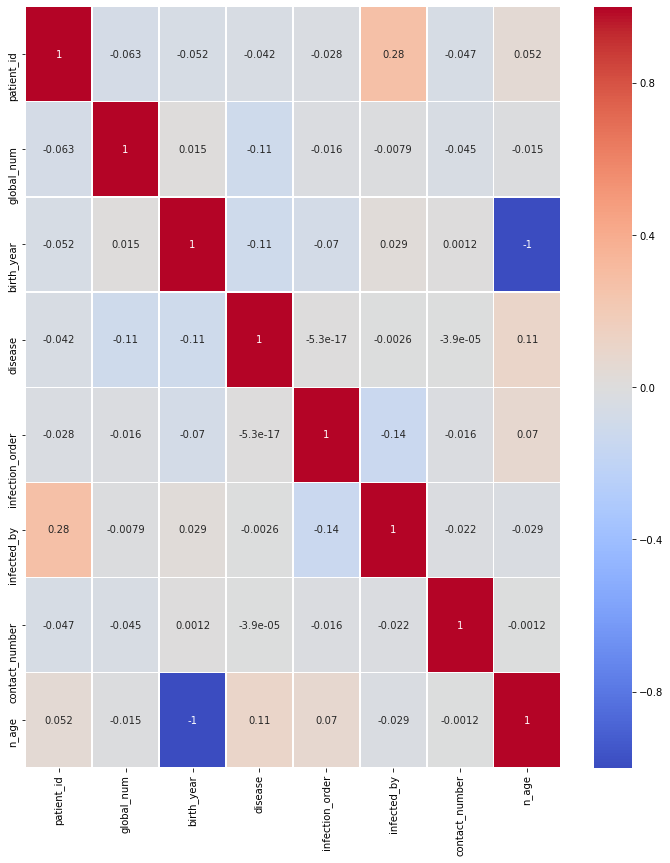

In [28]:
#Creating a heatmap for the correlations
plt.figure(figsize=(12,14))
sns.heatmap(covid1[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=0.3)
plt.show()

**<font color='teal'> Plot the boxplots to check for outliers. </font>**

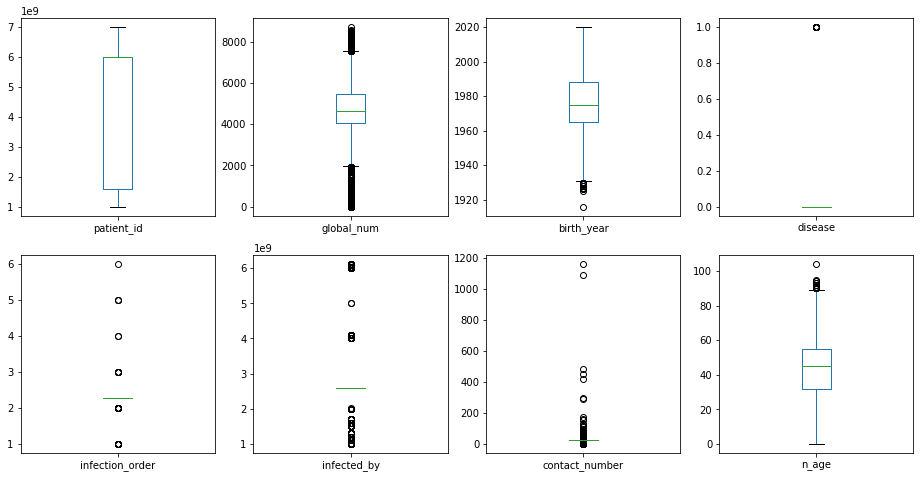

In [29]:
covid1[numeric_cols].plot(kind='box', grid=False, subplots=True, layout=(2,4), figsize=(16,8))
plt.show()

**<font color='teal'> Create dummy features for object type features. </font>**

In [30]:
#Creating my X with the features
X = covid1.drop('state', axis=1)

In [31]:
#define the response variable
y=covid1[['state']]

#Dummy feature creation
X = pd.get_dummies(X, drop_first=True)

### Split into test and train subsamples

In [32]:
#Leaving 25% of my data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

### Scale data in prep for modeling

In [33]:
# build scaler based on training data and apply it to test data to then also scale the test data
sc = preprocessing.StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

### Fit Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf = RandomForestClassifier(n_estimators=250, random_state = 13)
rf.fit(X_train_scaled,y_train.values.ravel())
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:,1]


print('Accuracy: {}'.format(round(accuracy_score(y_test, y_pred),4)))
print(classification_report(y_test, y_pred))


Accuracy: 0.863
              precision    recall  f1-score   support

    deceased       1.00      0.90      0.95        10
    isolated       0.89      0.95      0.92       446
    released       0.55      0.34      0.42        77

    accuracy                           0.86       533
   macro avg       0.81      0.73      0.76       533
weighted avg       0.84      0.86      0.85       533



### Create Confusion Matrix plots

In [35]:
class_names=['isolated','released','deceased'] # name  of classes

Confusion matrix, without normalization
[[  9   1   0]
 [  0 425  21]
 [  0  51  26]]
Normalized confusion matrix
[[0.9  0.1  0.  ]
 [0.   0.95 0.05]
 [0.   0.66 0.34]]


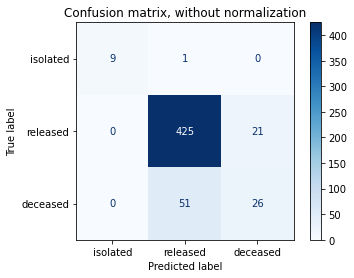

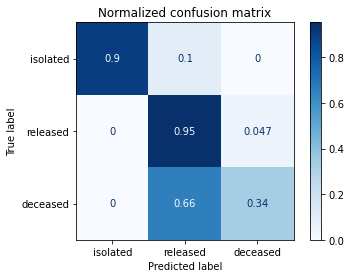

In [36]:
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred) #confusion matrix without normalization
cm_norm = cm / cm.astype(np.float).sum(axis=1, keepdims=True) #normalizing the matrix
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

#Using plot_confusion_matrix for better visualization
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Plot feature importances

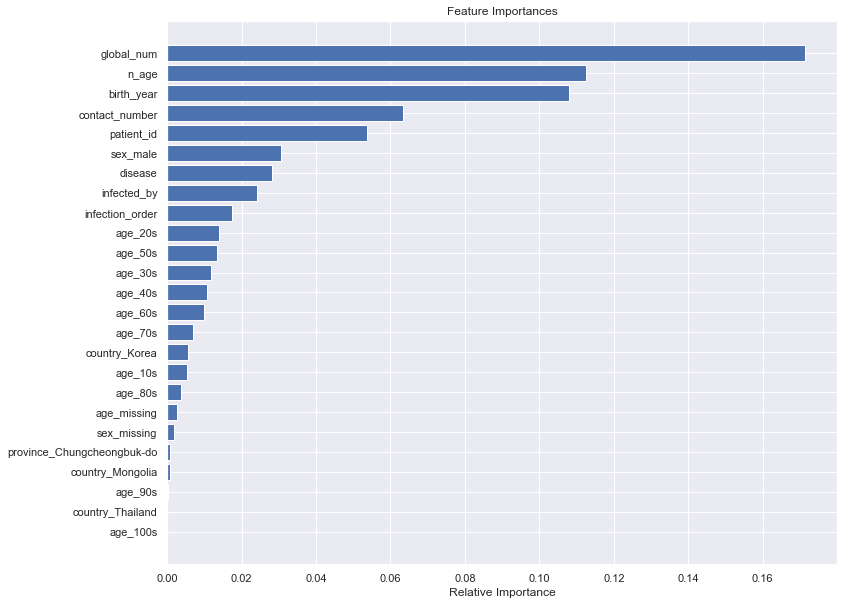

In [37]:
#Getting the name of my features
features = X.columns
#Getting the importance of the top 25 features
feature_importance = rf.feature_importances_[:25]
indices = np.argsort(feature_importance)[:25]

sns.set()
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()